In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('../data/processed/cangas_IU.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Dividir los datos en características (X) y etiquetas (y)
X = data[['fecha', 'UI']]
y = data['abierto/cerrado']

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
X['dia'] = X['fecha'].dt.day
X['mes'] = X['fecha'].dt.month
X['año'] = X['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
X = X.drop('fecha', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores NaN en los conjuntos de entrenamiento y prueba
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegurarse de que y_train tenga la misma longitud que X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Asegurarse de que y_test tenga la misma longitud que X_test

# Luego, puedes proceder con el entrenamiento y evaluación de los modelos.




,UI,dia,mes,año
2210,3392.32500,22,3,2016
2822,1960.62250,24,11,2017
1601,729.07250,22,7,2014
208,-128.13650,28,9,2010
2552,-1549.76750,27,2,2017
...,...,...,...,...
1095,-1025.56800,3,3,2013
1130,-949.57775,7,4,2013
1294,1211.62500,18,9,2013
860,1332.73000,11,7,2012


Precisión Regresión Logística: 70.97%


KeyError: 1

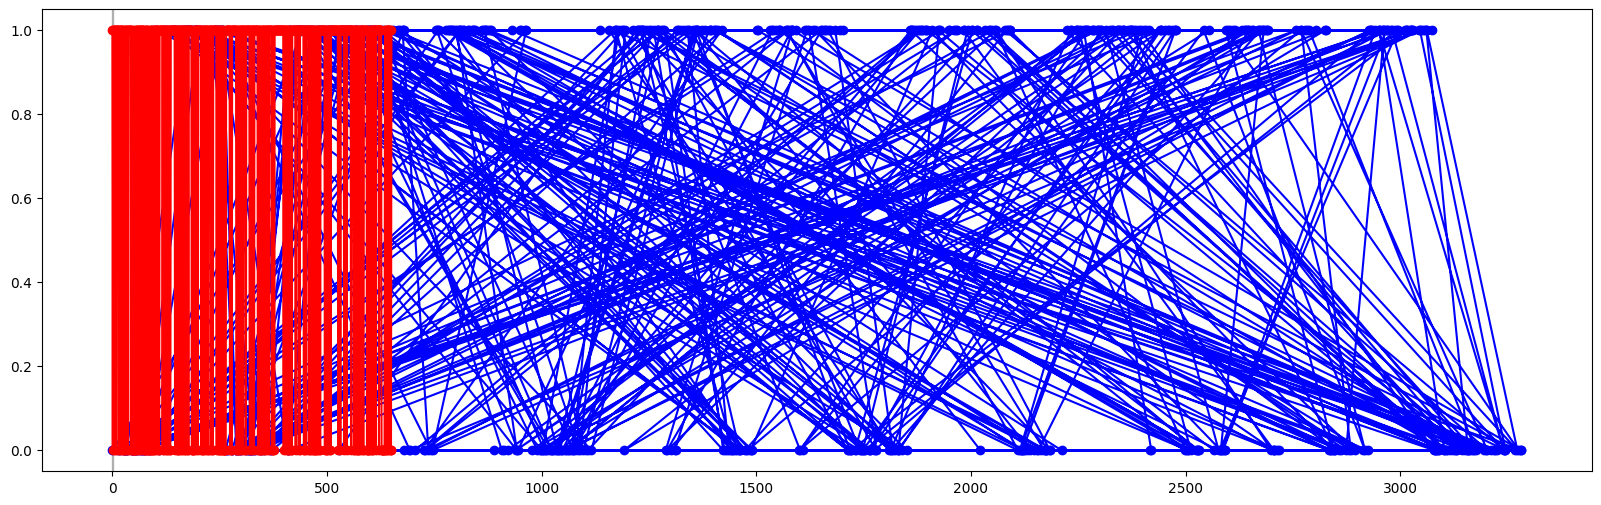

In [31]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred = log_reg.predict(X_test)

# Calcular la precisión
precision_log_reg = accuracy_score(y_test, y_pred)
print(f"Precisión Regresión Logística: {precision_log_reg * 100:.2f}%")

import matplotlib.pyplot as plt

# Crear la figura y el eje
plt.figure(figsize=(20, 6))
ax = plt.gca()  # Obtener el eje actual

# Graficar valores reales y predicciones
plt.plot(y_test, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Sombrear las áreas de discordancia
# Iterar a través de los datos de prueba
for i in range(len(y_test)):
    # Si la predicción es diferente del valor real, sombrear el área
    if y_test[i] != y_pred[i]:
        ax.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.5)

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()



Precisión Árbol de Decisión: 98.16%


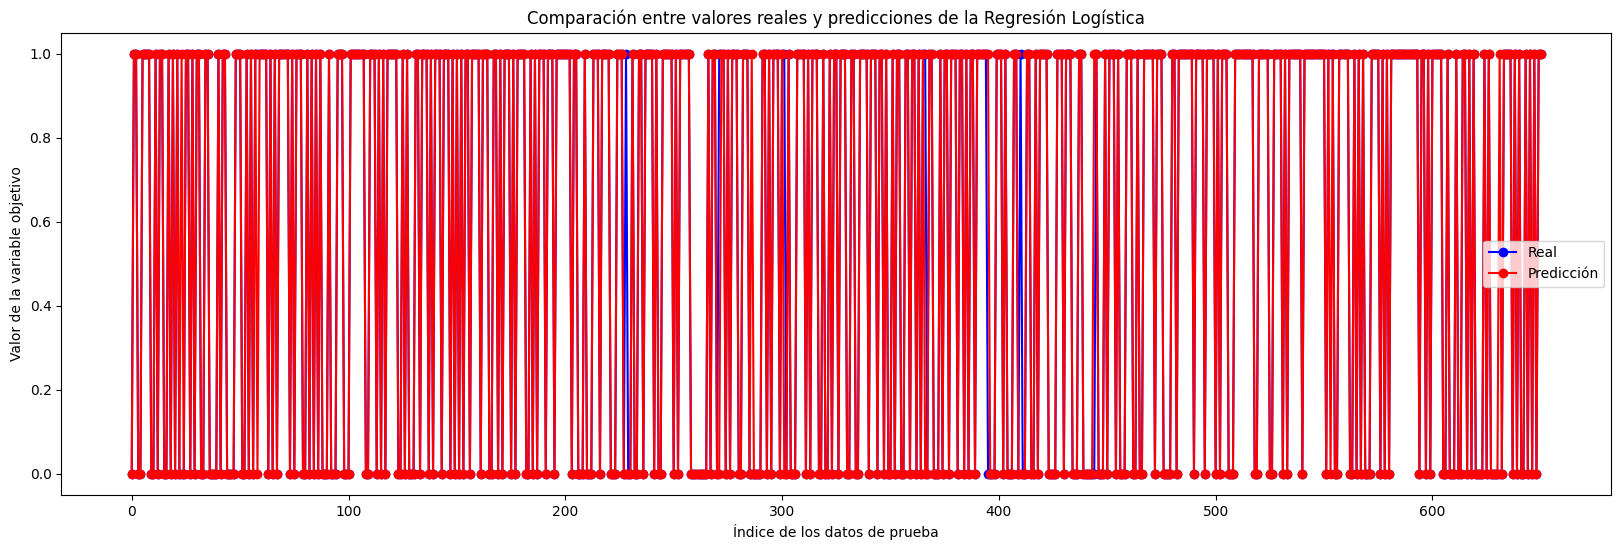

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Hacer predicciones
y_pred = decision_tree.predict(X_test)

# Calcular la precisión
precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión Árbol de Decisión: {precision_decision_tree * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


Precisión Random Forest: 96.77%


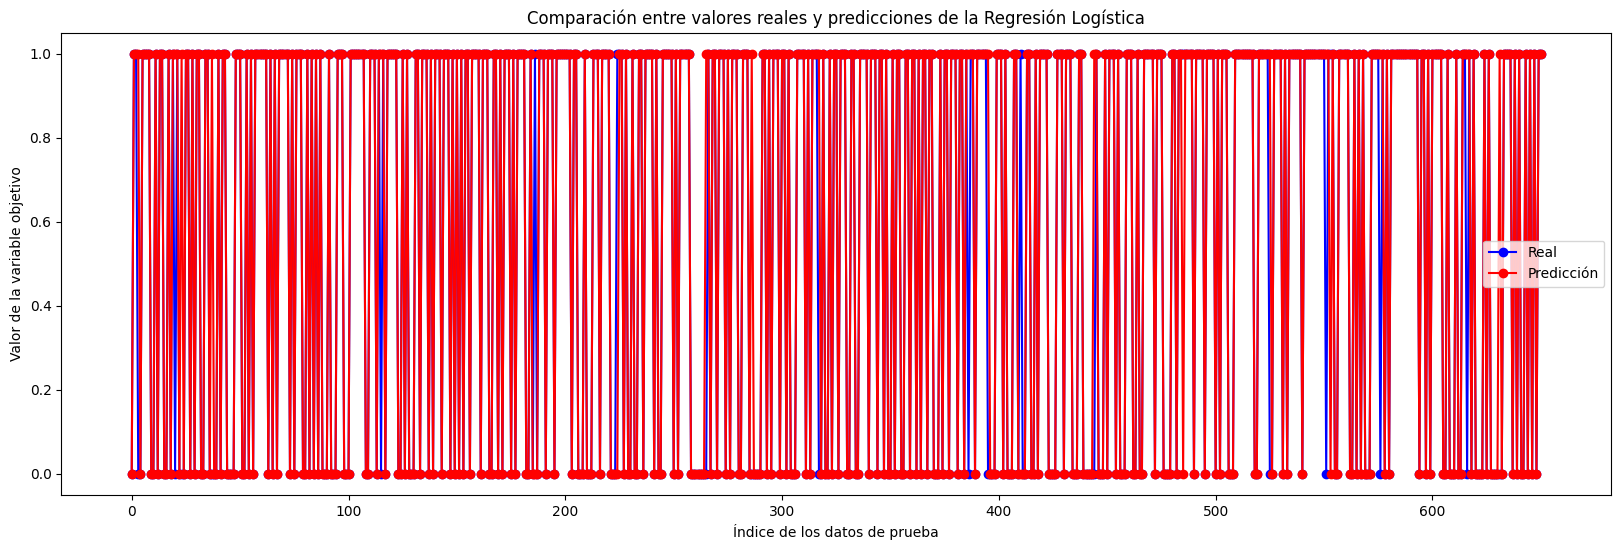

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
random_forest = RandomForestClassifier(random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Hacer predicciones
y_pred = random_forest.predict(X_test)

# Calcular la precisión
precision_random_forest = accuracy_score(y_test, y_pred)
print(f"Precisión Random Forest: {precision_random_forest * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


Precisión SVM: 60.37%


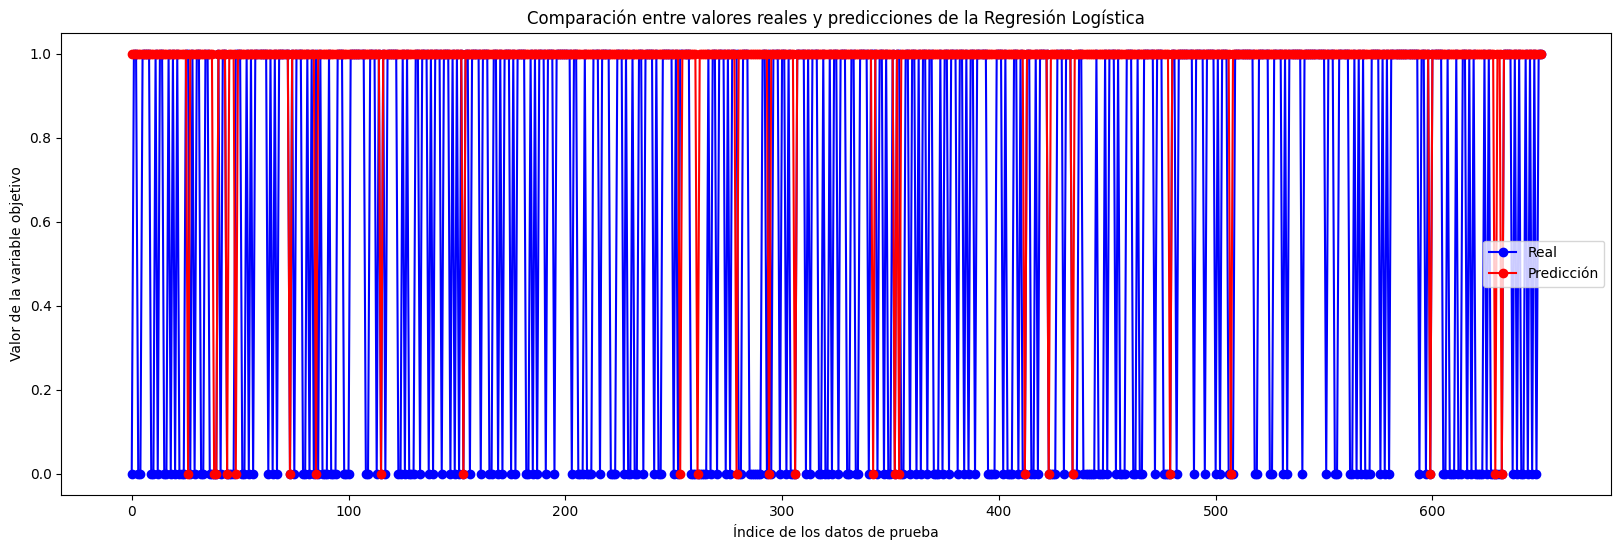

In [24]:
from sklearn.svm import SVC

# Crear el modelo
svm = SVC(random_state=42)

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm.predict(X_test)

# Calcular la precisión
precision_svm = accuracy_score(y_test, y_pred)
print(f"Precisión SVM: {precision_svm * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

Epoch 1/20


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5596 - loss: 52.4668 - val_accuracy: 0.4992 - val_loss: 7.0247
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.5362 - loss: 5.3339 - val_accuracy: 0.4624 - val_loss: 3.4886
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.5493 - loss: 2.7744 - val_accuracy: 0.5991 - val_loss: 4.5696
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.5635 - loss: 3.7319 - val_accuracy: 0.6237 - val_loss: 6.4018
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.5445 - loss: 3.6444 - val_accuracy: 0.6206 - val_loss: 3.6882
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5632 - loss: 3.4163 - val_accuracy: 0.5914 - val_loss: 2.5477
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5434 - loss: 3.7287 - val_accuracy: 0.5054 - val_loss: 3.7347
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5440 - loss: 3.6646 - val_accuracy: 0.5131 - val_l

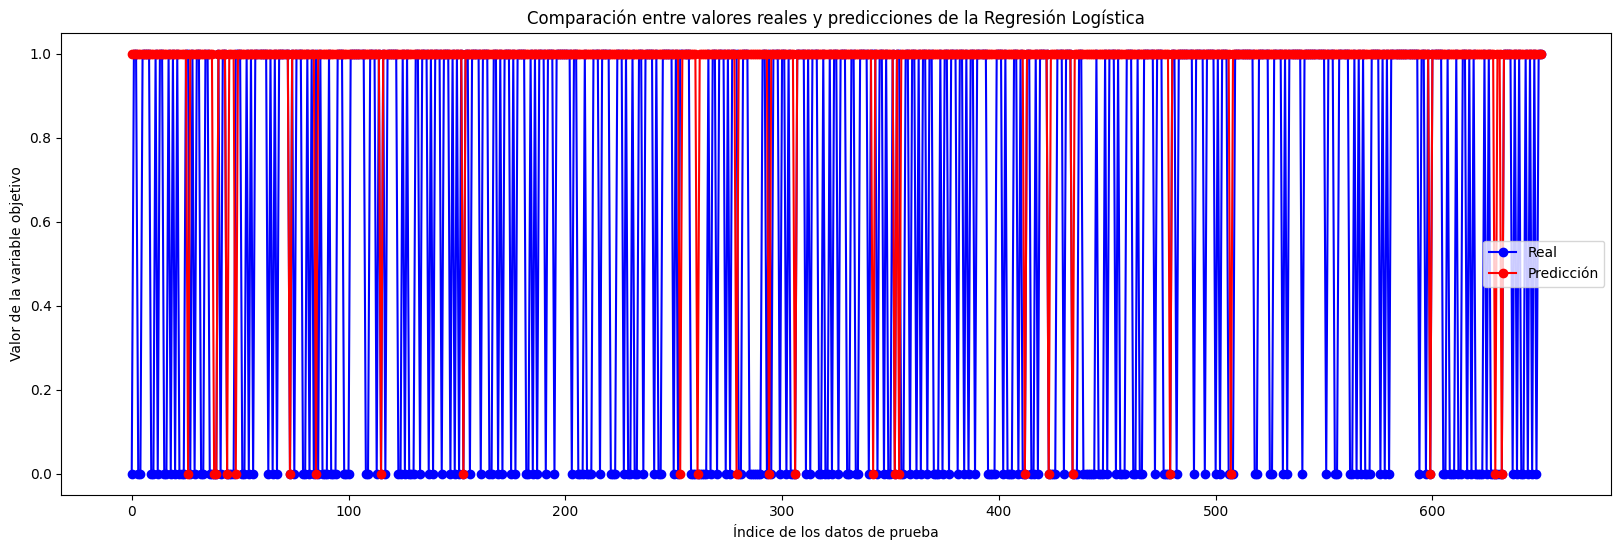

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión Red Neuronal: {accuracy * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()
